In [37]:
import warnings

warnings.simplefilter('ignore')

In [38]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [39]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [40]:
!pip install -U matplotlib
!pip install -U font-manager

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not find a version that satisfies the requirement font-manager (from versions: none)
ERROR: No matching distribution found for font-manager


In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [42]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [43]:
path = './data/'

df = pd.read_csv(path+'월별데이터 총병합.csv')

In [44]:
df

,Unnamed: 0,Year,Month,Region_Name,Region_Code,Building_Use,Sell_Price,Sell_BA,Sell_Count,JS_Price,...,UR,LC_index,CA_index,TC_index,SDT_index,Crime_Rates,School_Counts,Subway_Counts,Univ_Counts,Park_Counts
0,0,2014,1,강남구,11680,단독다가구,231221.43,321.47,14,14987.43,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
1,1,2014,1,강남구,11680,아파트,89505.48,86.55,631,47138.67,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
2,2,2014,1,강남구,11680,연립다세대,34570.70,60.10,76,19115.34,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
3,3,2014,1,강남구,11680,오피스텔,25451.99,40.23,70,31225.00,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
4,4,2014,2,강남구,11680,단독다가구,374166.85,452.19,13,14679.90,...,4.5,79.2,85.6,82.7,121.038496,1517.02,77,21,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,8051,2021,11,중랑구,11260,오피스텔,17302.79,29.17,14,13128.67,...,2.6,107.1,105.3,105.7,100.134564,819.12,48,8,1,6
8052,8052,2021,12,중랑구,11260,단독다가구,97187.70,198.71,30,12778.38,...,3.5,107.3,106.2,106.3,94.655902,819.12,48,8,1,6
8053,8053,2021,12,중랑구,11260,아파트,62155.66,66.94,53,34043.88,...,3.5,107.3,106.2,106.3,94.655902,819.12,48,8,1,6
8054,8054,2021,12,중랑구,11260,연립다세대,31058.43,45.39,166,21929.65,...,3.5,107.3,106.2,106.3,94.655902,819.12,48,8,1,6


In [45]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - Year : 년
    - Month : 월
    - Region_Code : 자치구 코드
    - JS_Count : 전세 거래량
   
- Continous
    - Sell : 매매
    - Sell_Price : 매매 가격
    - Sell_BA = Sell_building Area : 매매 건물 면적
    - Sell_PPA = Sell_Price Per Area : 면적 당 매매 가격
    - Sell_PPP = Sell_Price Per Pyeong : 평 당 매매 가격
    - Sell_Count : 매매 거래량
    - JS : 전세
    - JS_Price : 전세 가격
    - JS_BA = JS_Building Area : 임대 면적
    - JS_PPA = JS_Price Per Area : 임대 면적 당 전세 가격
    - JS_PPP = JS_Price Per Pyeong : 평 당 전세 가격
    - CR = Charter Rate : 전세가율
    - CR_PPA  = Charter_Rate_Price Per Area : 면적 당 전세가율
    - CR_PPP = Charter Rate_Price Per Pyeong : 평 당 전세가율
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8056 non-null   int64  
 1   Month          8056 non-null   int64  
 2   Region_Name    8056 non-null   object 
 3   Region_Code    8056 non-null   int64  
 4   Building_Use   8056 non-null   object 
 5   Sell_Price     8056 non-null   float64
 6   Sell_BA        8056 non-null   float64
 7   Sell_Count     8056 non-null   int64  
 8   JS_Price       8056 non-null   float64
 9   JS_BA          8056 non-null   float64
 10  JS_Count       8056 non-null   int64  
 11  CR             8056 non-null   float64
 12  IR             8056 non-null   float64
 13  UR             8056 non-null   float64
 14  LC_index       8056 non-null   float64
 15  CA_index       8056 non-null   float64
 16  TC_index       8056 non-null   float64
 17  SDT_index      8056 non-null   float64
 18  Crime_Ra

In [47]:
df.columns

Index(['Year', 'Month', 'Region_Name', 'Region_Code', 'Building_Use',
       'Sell_Price', 'Sell_BA', 'Sell_Count', 'JS_Price', 'JS_BA', 'JS_Count',
       'CR', 'IR', 'UR', 'LC_index', 'CA_index', 'TC_index', 'SDT_index',
       'Crime_Rates', 'School_Counts', 'Subway_Counts', 'Univ_Counts',
       'Park_Counts'],
      dtype='object')

## Feature_Scaling

In [48]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만)
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# 데이터 정규화
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [49]:
# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    encoded_df = df.copy()
    for column in df.columns:
        if df[column].dtype == object:
            encoded_df = pd.get_dummies(encoded_df, columns=[column], prefix=column)
            print(column)
    return encoded_df

In [50]:
df_encoded = oh_encoding(df)

Region_Name
Building_Use


## DF 사전진단

### 선형패턴 확인

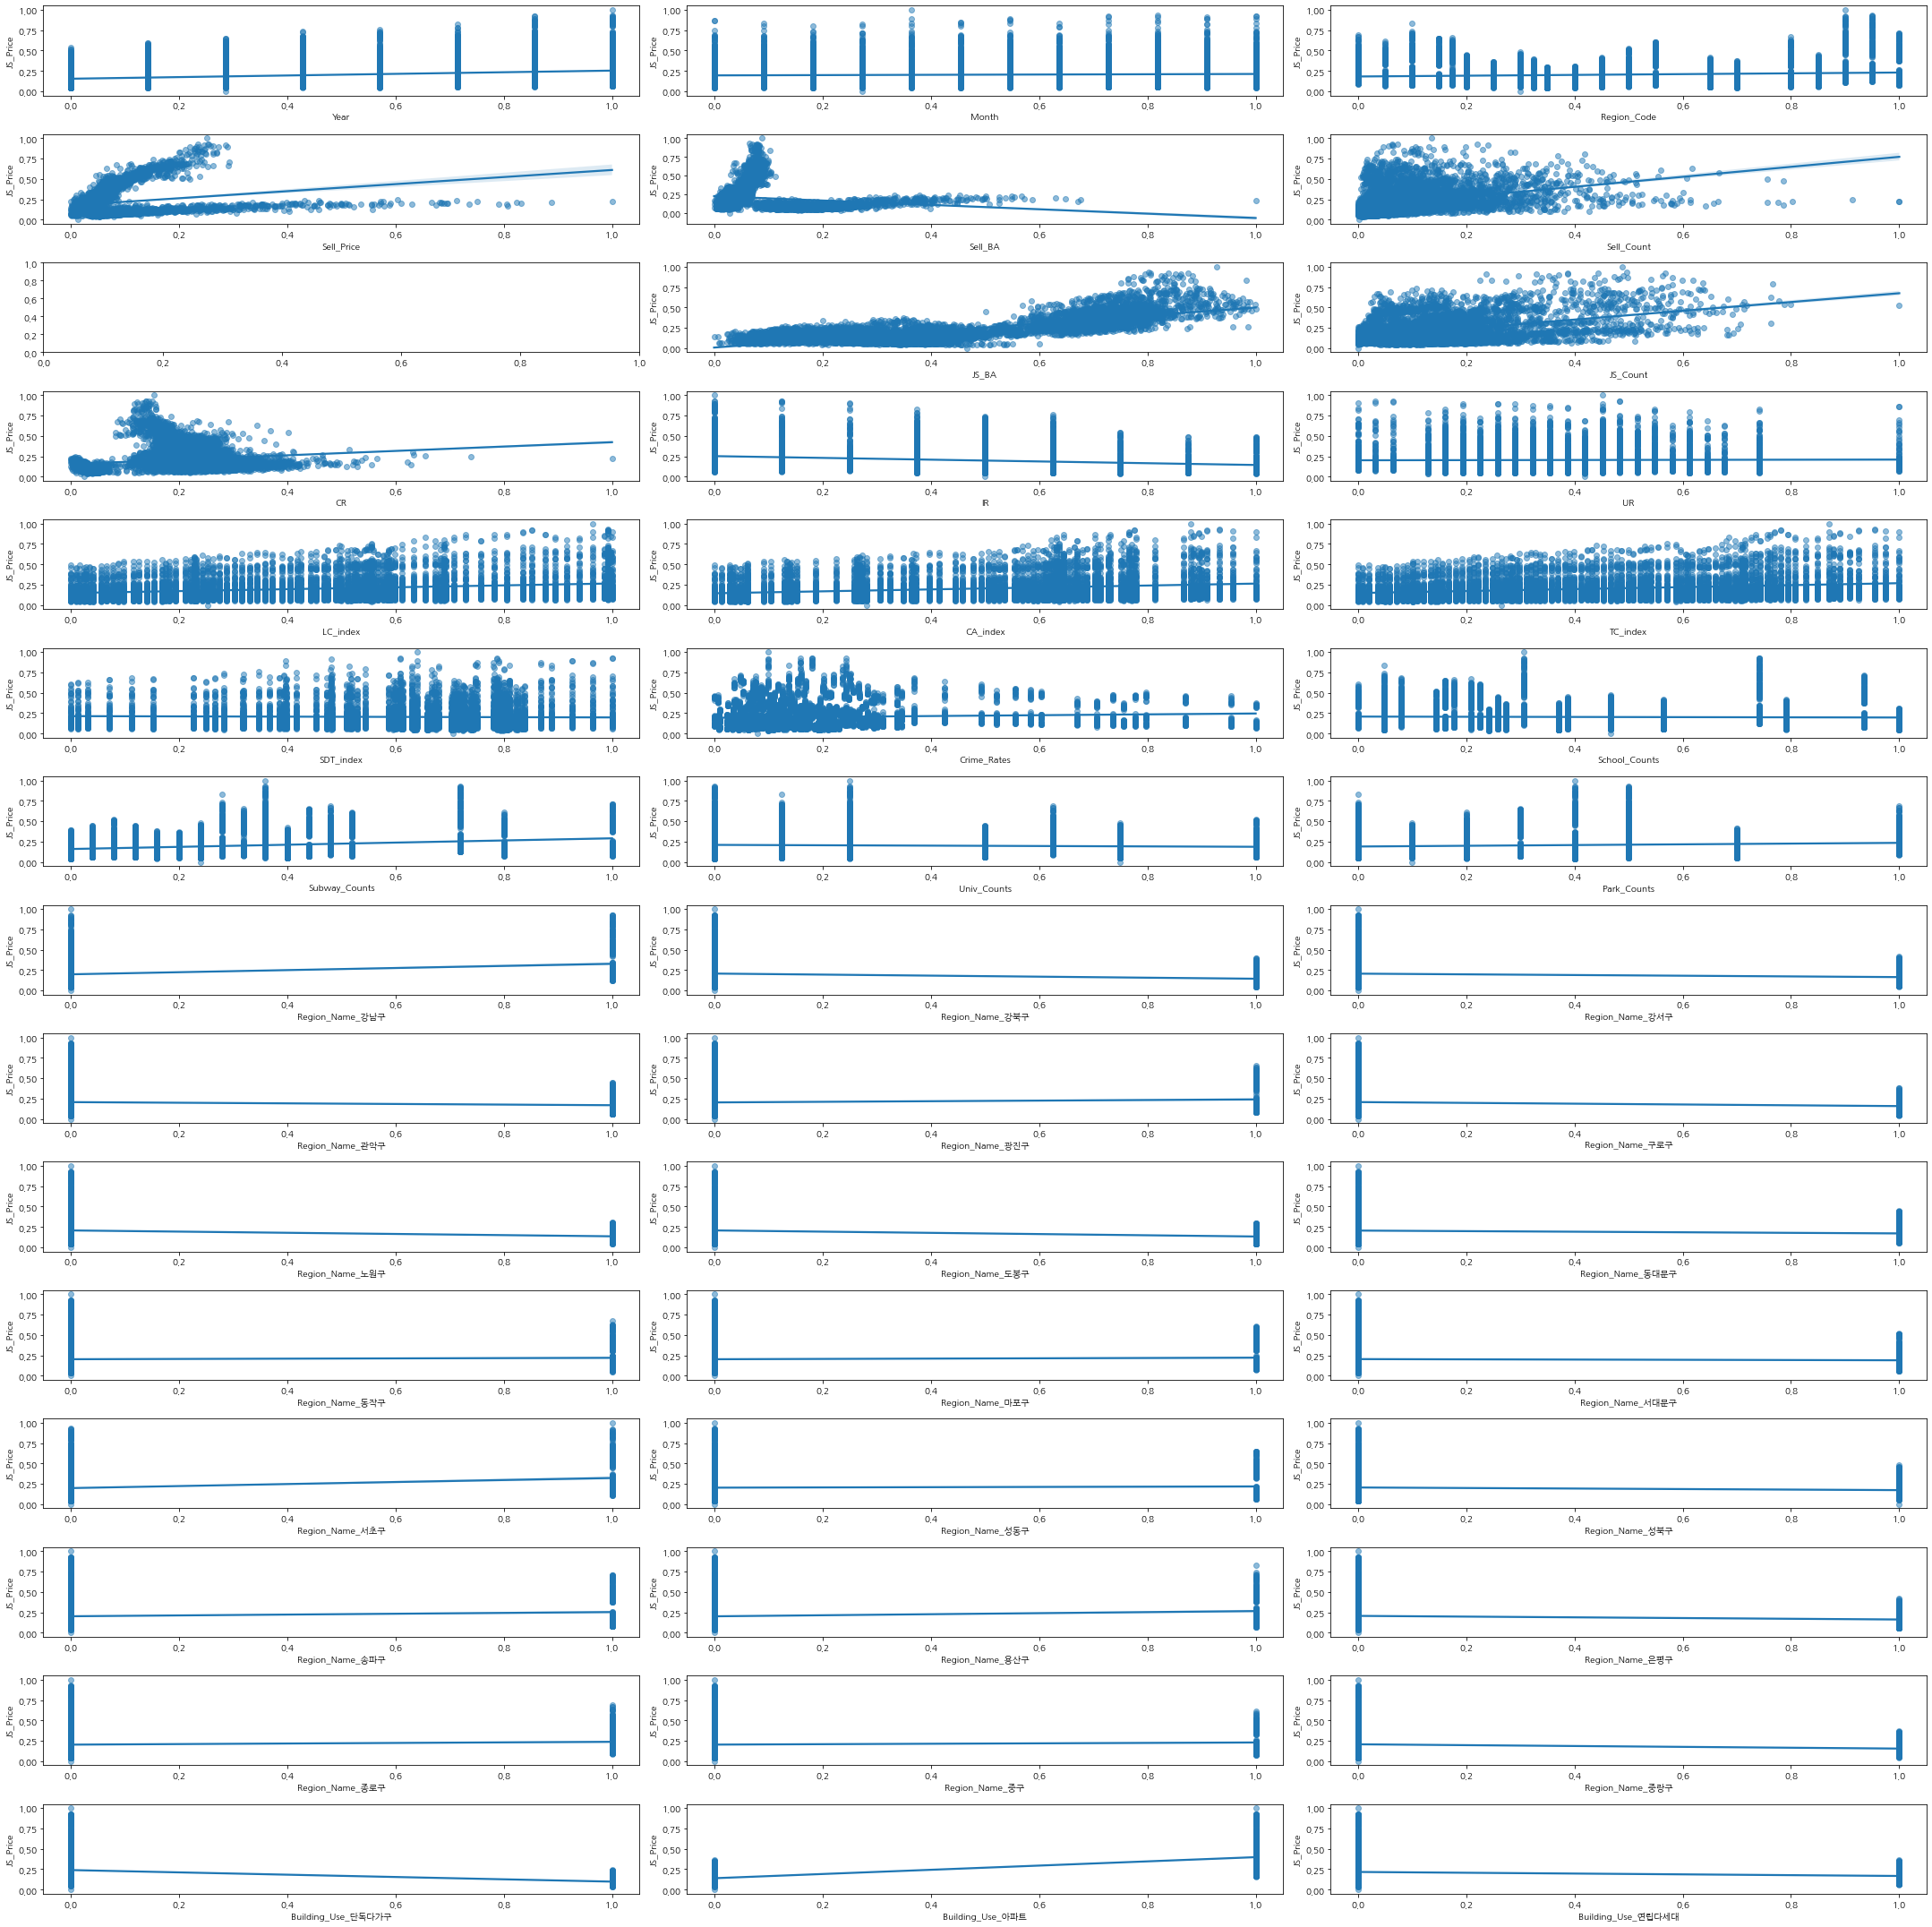

In [51]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30,30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 독립 변수와 종속 변수 간의 선형 관계 확인
for i, independent_column in enumerate(df_encoded.columns):
    if independent_column != 'JS_Price':
        if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
            sns.regplot(x=independent_column, y='JS_Price', data=df_encoded, ax=ax[i], scatter_kws={'alpha': 0.5})
            ax[i].set_xlabel(independent_column)
            ax[i].set_ylabel('JS_Price')

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## 이상치 확인

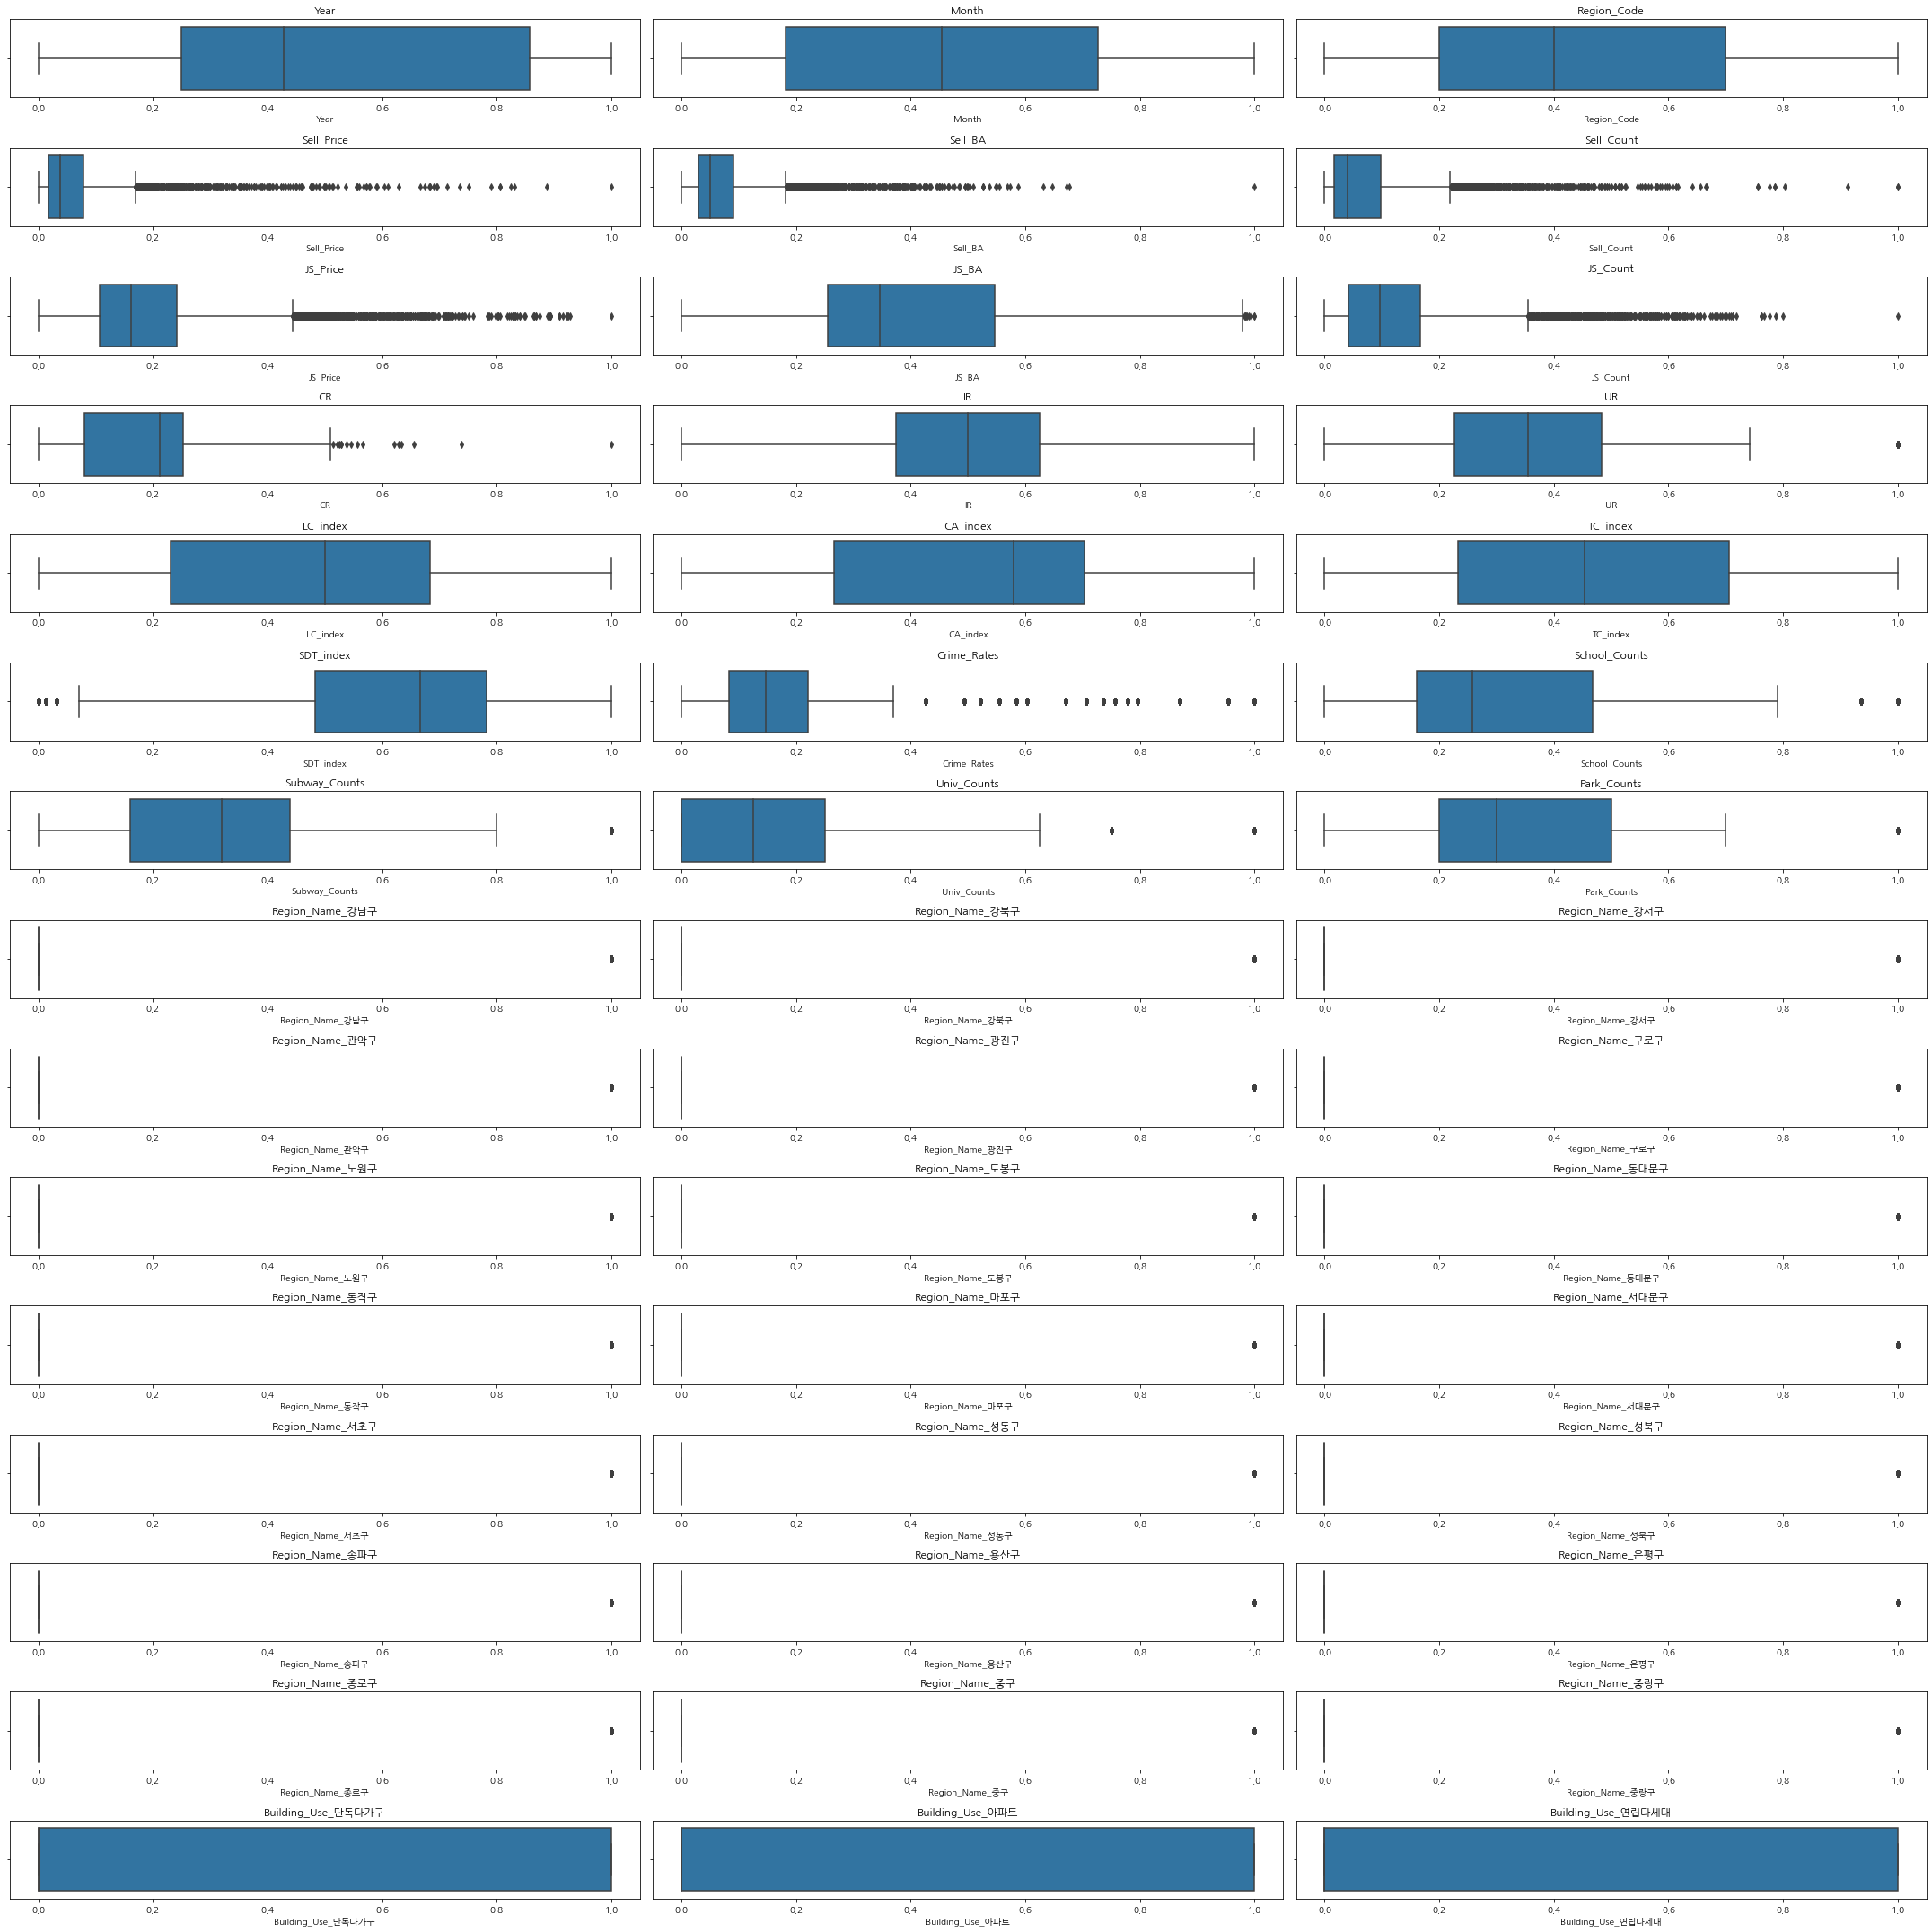

In [52]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

for i, column in enumerate(df_encoded.columns):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.boxplot(x=column, data=df_encoded, ax=ax[i], orient='v')
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 정규성 확인

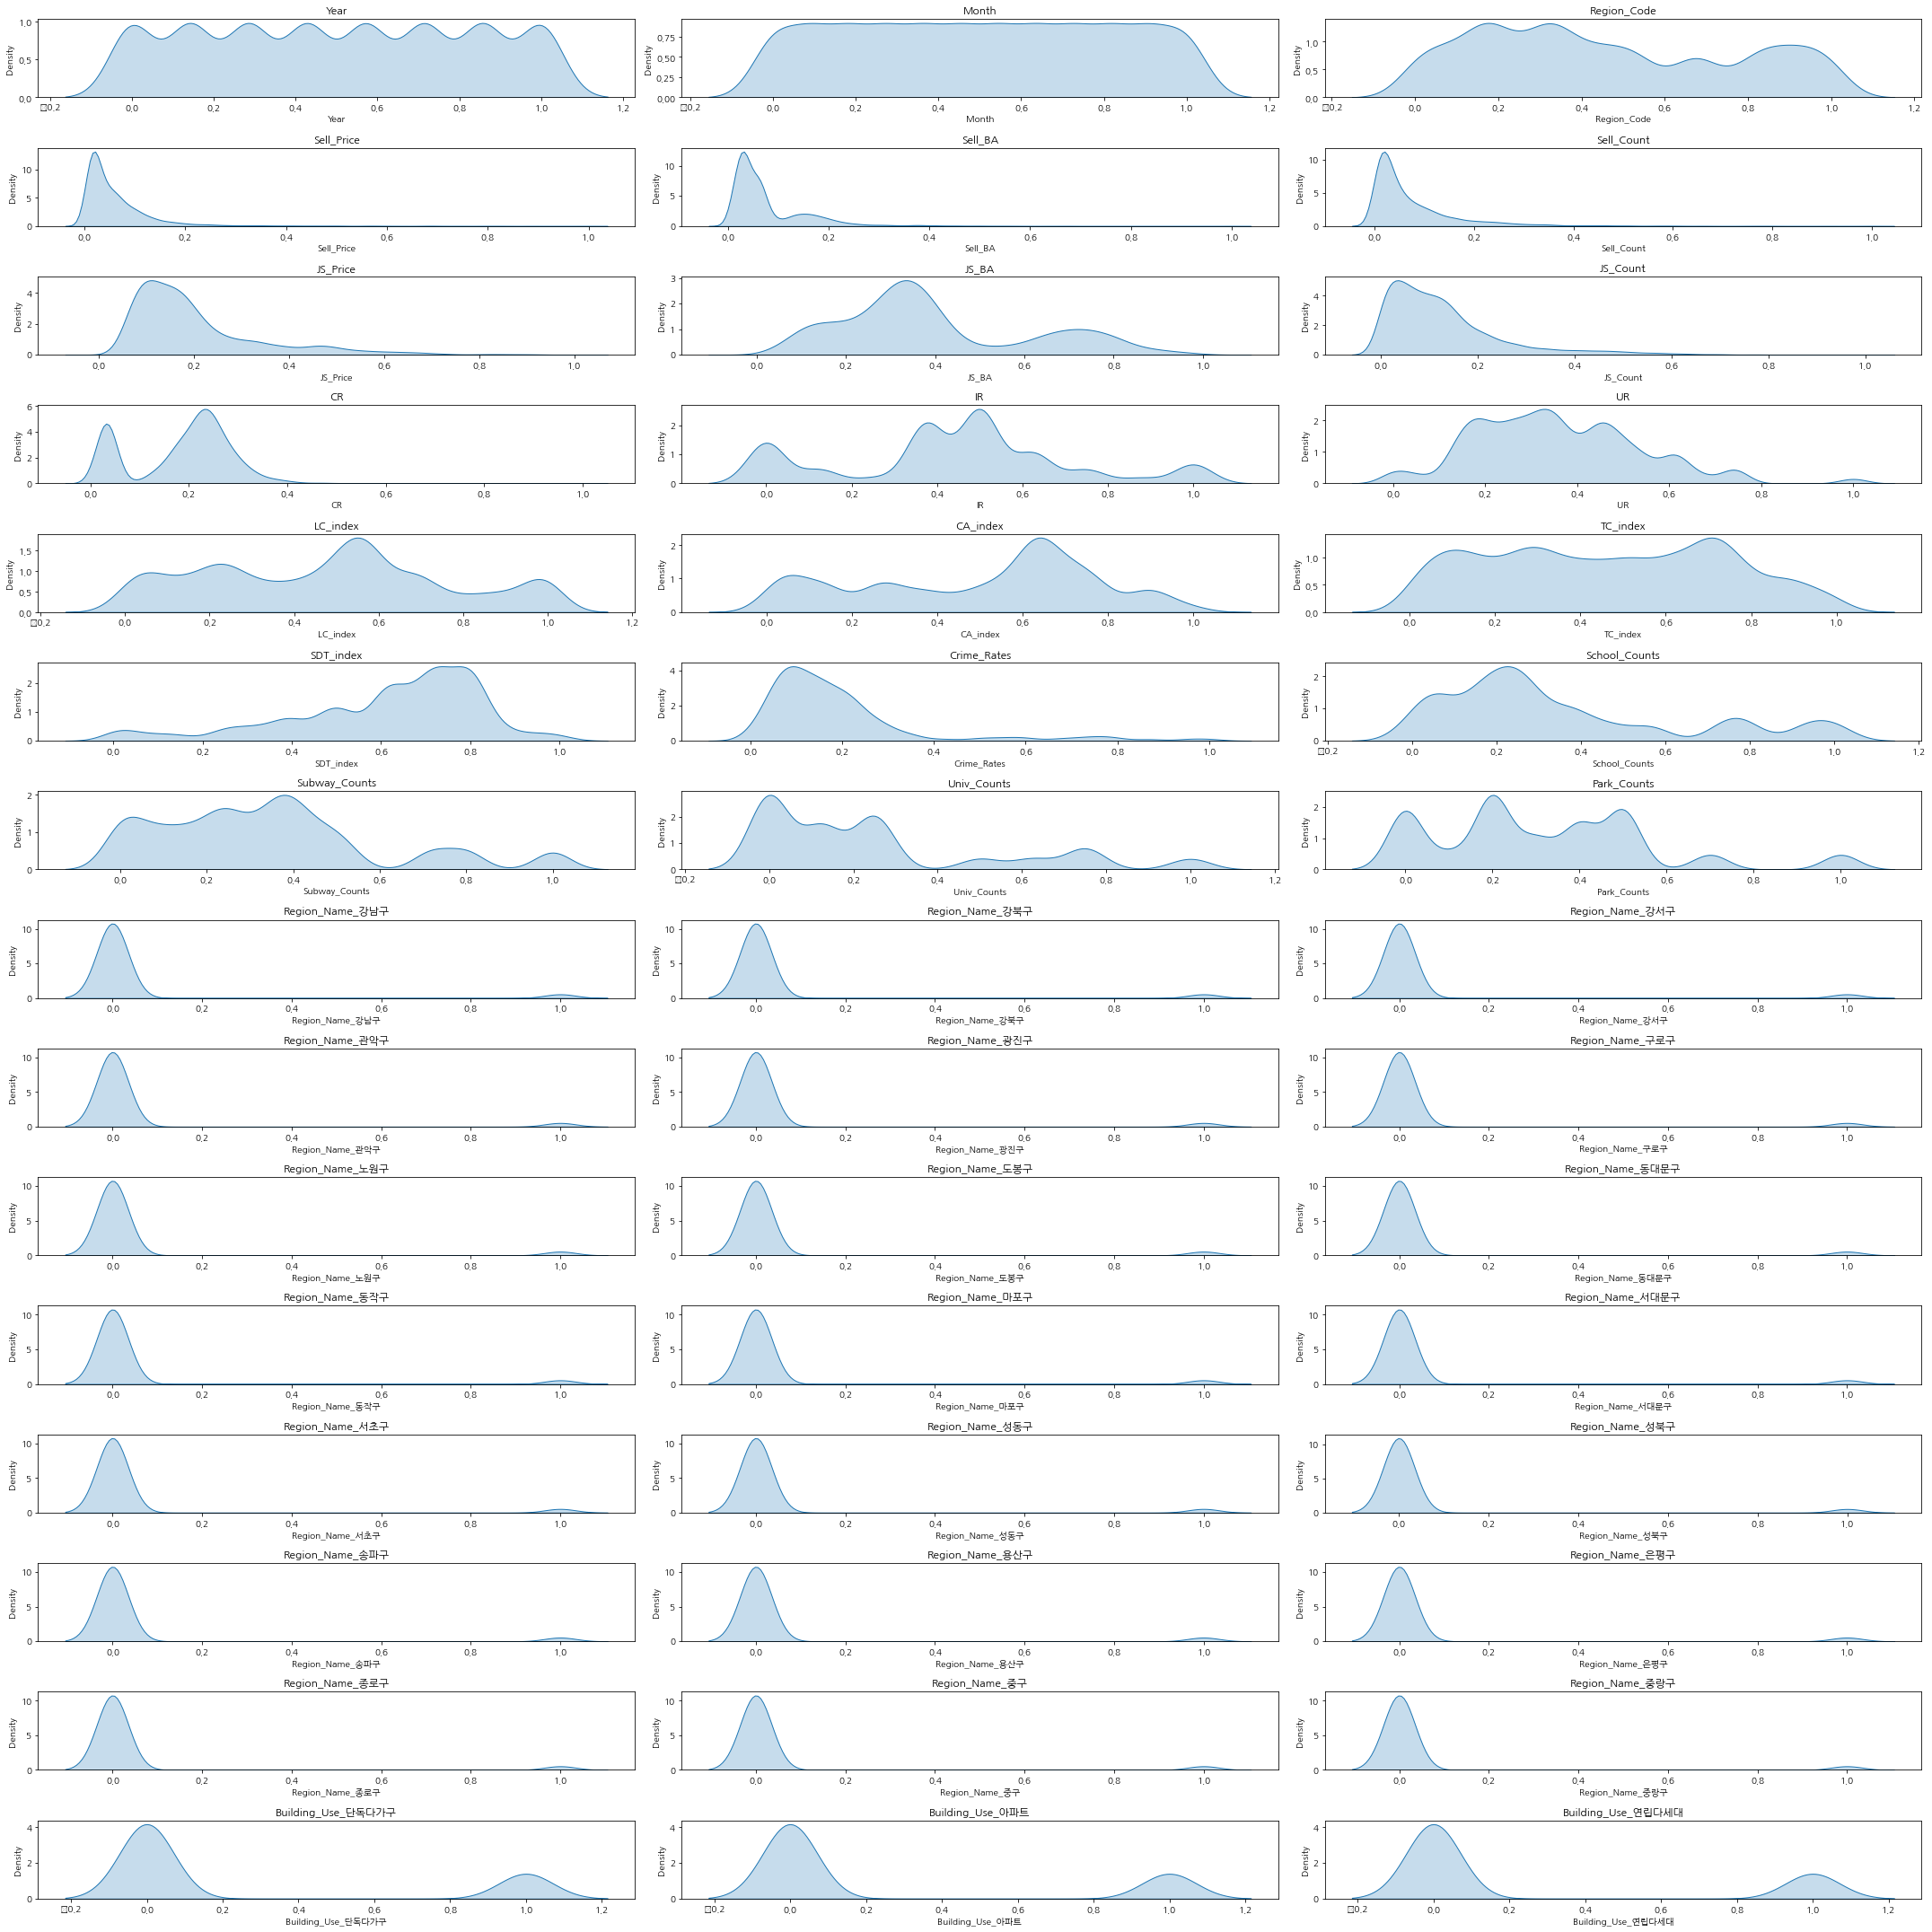

In [53]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

for i, column in enumerate(df_encoded.columns):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.kdeplot(data=df_encoded[column], ax=ax[i], shade=True)
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [54]:
for column in df_encoded.columns:
    print(f"{column}의 왜도는", scipy.stats.skew(df_encoded[column]))

Year의 왜도는 0.0003247749256665011
Month의 왜도는 0.00033920749593006205
Region_Code의 왜도는 0.30450262459443983
Sell_Price의 왜도는 3.9727190588503807
Sell_BA의 왜도는 2.4495172655514184
Sell_Count의 왜도는 2.76880916057579
JS_Price의 왜도는 1.76244976287627
JS_BA의 왜도는 0.667806013801015
JS_Count의 왜도는 1.8305577356467448
CR의 왜도는 -0.15629092032196915
IR의 왜도는 0.08505675724867282
UR의 왜도는 0.6002300019390713
LC_index의 왜도는 0.14508711372074481
CA_index의 왜도는 -0.3125227275984634
TC_index의 왜도는 0.061455561954712835
SDT_index의 왜도는 -0.9788114300435264
Crime_Rates의 왜도는 2.3752368154891133
School_Counts의 왜도는 0.9471388702922178
Subway_Counts의 왜도는 0.8550406427208967
Univ_Counts의 왜도는 1.1600146592543088
Park_Counts의 왜도는 0.8342012107146238
Region_Name_강남구의 왜도는 4.246082759945932
Region_Name_강북구의 왜도는 4.252511945440959
Region_Name_강서구의 왜도는 4.246082759945932
Region_Name_관악구의 왜도는 4.246082759945931
Region_Name_광진구의 왜도는 4.2460827599459305
Region_Name_구로구의 왜도는 4.246082759945931
Region_Name_노원구의 왜도는 4.246082759945931
Region_Name_도봉구의 왜도는 4.2

## Regression Analysis

In [76]:
# 특성 선택
selected_features = ['Subway_Counts', 'JS_BA', 'JS_Count', 'Sell_Count', 'LC_index', 'TC_index', 'Year',
                     'CA_index', 'Sell_Price', 'CR', 'Sell_BA', 'IR', 'Building_Use_아파트', 'Region_Name_강남구', 'Region_Name_서초구', 'Building_Use_단독다가구']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     4211.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:01:40   Log-Likelihood:                 13330.
No. Observations:                8056   AIC:                        -2.663e+04
Df Residuals:                    8039   BIC:                        -2.651e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0422      0

## 다중공선성

In [77]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

# 결과 출력
print(vif)

              Features         VIF
0        Subway_Counts    3.301223
1                JS_BA   20.175441
2             JS_Count    5.197940
3           Sell_Count    4.102361
4             LC_index  312.157548
5             TC_index  469.370995
6                 Year  170.466097
7             CA_index  112.983696
8           Sell_Price    9.383397
9                   CR   12.210161
10             Sell_BA   17.201182
11                  IR    9.394348
12    Building_Use_아파트    7.308476
13     Region_Name_강남구    1.446193
14     Region_Name_서초구    1.221522
15  Building_Use_단독다가구    8.867668


## 모델가정 확인

### 선형성

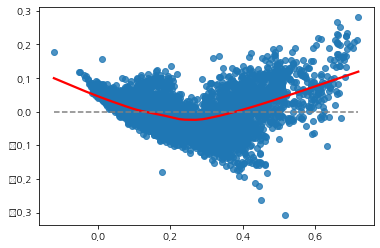

In [78]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

Shapiro-Wilk Test p-value: 7.99567731538176e-39


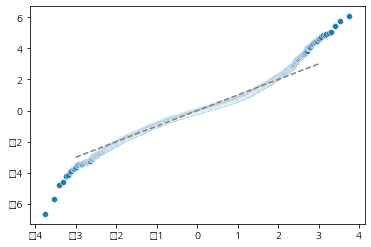

In [79]:
# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(data = df_encoded, x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)

- 극단값 도출하고 제거

In [80]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

360     0.100208
372     0.052095
368     0.051404
240     0.041006
4971    0.031016
dtype: float64

In [84]:
# Cook's 거리를 Series로 변환하고 내림차순으로 정렬
cd_series = pd.Series(cd, name="Cook's Distance")
cd_sorted = cd_series.sort_values(ascending=False)

# Cook's 거리가 가장 큰 관측치 30개의 인덱스 확인
outlier_indices = cd_sorted.head(30).index

# Cook's 거리가 큰 관측치를 데이터프레임에서 제거
df_cleaned = df_encoded.drop(index=outlier_indices)

- 극단값 제거한 데이터로 모델 다시 생성

In [85]:
# 특성 선택
selected_features = ['Subway_Counts', 'JS_BA', 'JS_Count', 'Sell_Count', 'LC_index', 'TC_index', 'Year',
                     'CA_index', 'Sell_Price', 'CR', 'Sell_BA', 'IR', 'Building_Use_아파트', 'Region_Name_강남구', 'Region_Name_서초구', 'Building_Use_단독다가구']

# X 데이터 선택
X = df_cleaned[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_cleaned['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     4702.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:02:23   Log-Likelihood:                 14224.
No. Observations:                7856   AIC:                        -2.841e+04
Df Residuals:                    7839   BIC:                        -2.830e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0494      0

Shapiro-Wilk Test p-value: 4.665498730139201e-26


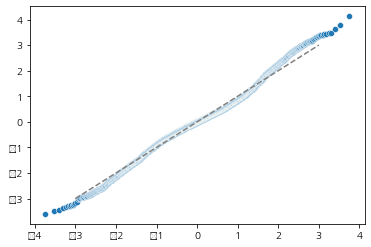

In [86]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_cleaned['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(data = df_cleaned, x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)

### 등분산성

<AxesSubplot:>

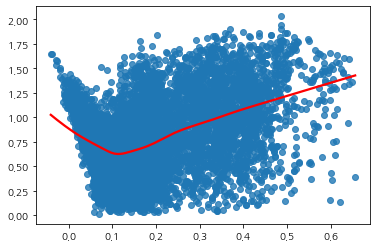

In [88]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

In [ ]:
# 특성 선택
selected_features = ['Subway_Counts', 'JS_BA', 'JS_Count', 'Sell_Count', 'LC_index', 'TC_index', 'Year',
                     'CA_index', 'Sell_Price', 'CR', 'Sell_BA', 'IR', 'Building_Use_아파트', 'Region_Name_강남구', 'Region_Name_서초구', 'Building_Use_단독다가구']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())